<a href="https://colab.research.google.com/github/shaad4224/yes_Bank_Stock_Closing_Price_Prediction/blob/main/yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
#import libraries for data handelling ,visualization,and for machine learning
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')


**Loading Dataset**

In [ ]:
#drive mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#copy the path
file_path='/content/drive/MyDrive/capstone/data_YesBank_StockPrices.csv'
df=pd.read_csv(file_path)

**Data description**

Dataset contains Yes Bank stock monthly prices since it listed on stock exchange.

**Following are its features:-**

**Date:** In our data its monthly observation of stock since it listed.

**Open:** The price a stock when the stock exchange open for the day.

**High:** The maximum price of a stock attain during given period of time.

**Low:** The minimum price of a stock attain during given period of time.

**Close:** The price of a stock when the stock exchange closed for the day

**Data Preprocessing**

In [ ]:
#First five observation of the data
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#last five observation of the data
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


**we have data available from july 2005 to november 2020**

In [ ]:
#shape of the data
df.shape

(185, 5)

In [ ]:
#summary of the data
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
#details of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
#unique values of the data
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

**Missing values**

**Chekcing for missing values**

In [ ]:
#number of null values in the data
df.isnull().sum().sort_values(ascending=False)

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

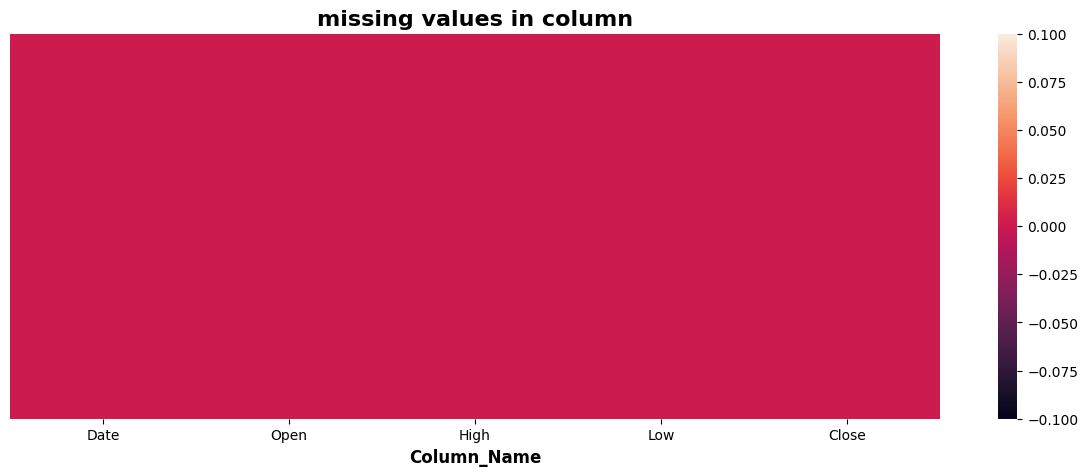

In [ ]:
#visualizing correlation of missing values
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=12, weight="bold")
plt.title("missing values in column",fontweight="bold",size=16)
plt.show()

**As we can see above there are no missing value presents thankfully**

**Duplicate values**

**Why is it important to remove duplicate records from my data?**

"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.***

In [ ]:
#To check the duplicated values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
180    False
181    False
182    False
183    False
184    False
Length: 185, dtype: bool

**In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.**

**Changing data type to required format**

In [ ]:
#import datetime library
from datetime import datetime

In [ ]:
#Change the date column to datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [ ]:
#First five observation of the data
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


**Checking datatype again**

In [ ]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


**Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**

An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.

**Analysis of Dependent Variable:**

**What is a dependent variable in data analysis?**

we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.

Our dependent variable is "Close Price" so we need to analysis this column with the other columns by using some visualisation plot

!!! now its time to visualise things.

firstly will see how closing price change with given time

In [ ]:
#correlation of the data
df.corr()

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


#Heatmap

**we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables**



<Axes: >

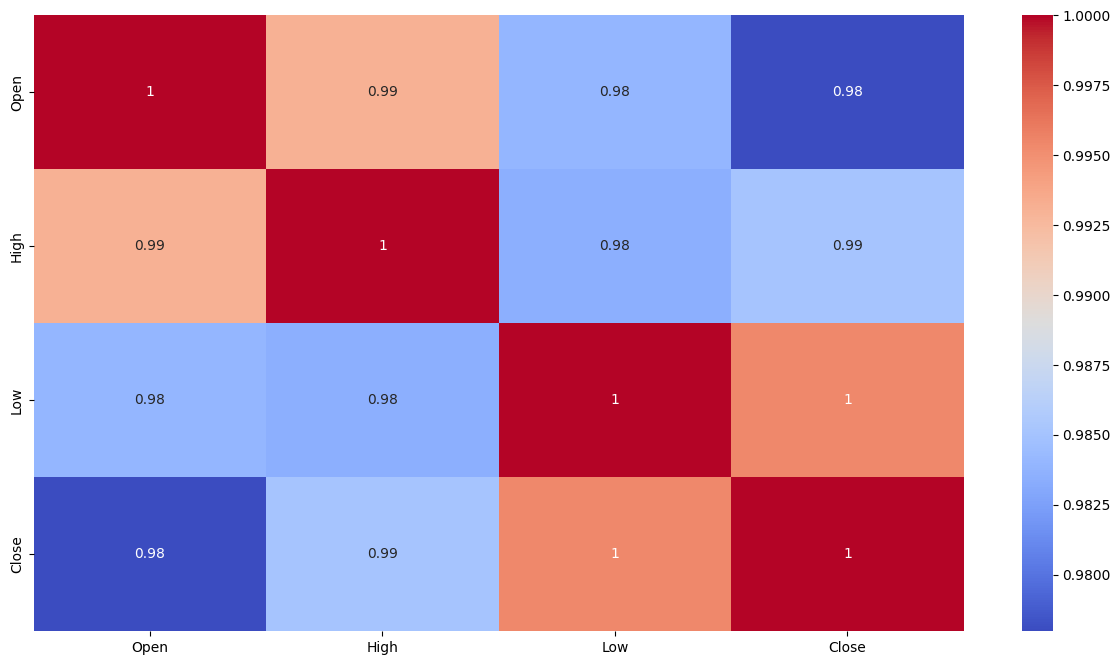

In [ ]:
#correlation of the data through visualization 
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(abs(correlation),annot=True,cmap='coolwarm')

There are very high correlation between independent variables which lead us to multicollinearity. High multicollinearity is not good for fitting model and prediction because a slight change in any independent variable will give very unpredictable results.

To check multicollinearity and how much it is in our dataset, we have to calculate VIF(Variation Inflation Factor)

so, we can decide which varible we should keep in our analysis and predicting model and which should be removed from the datasets.

**Time**

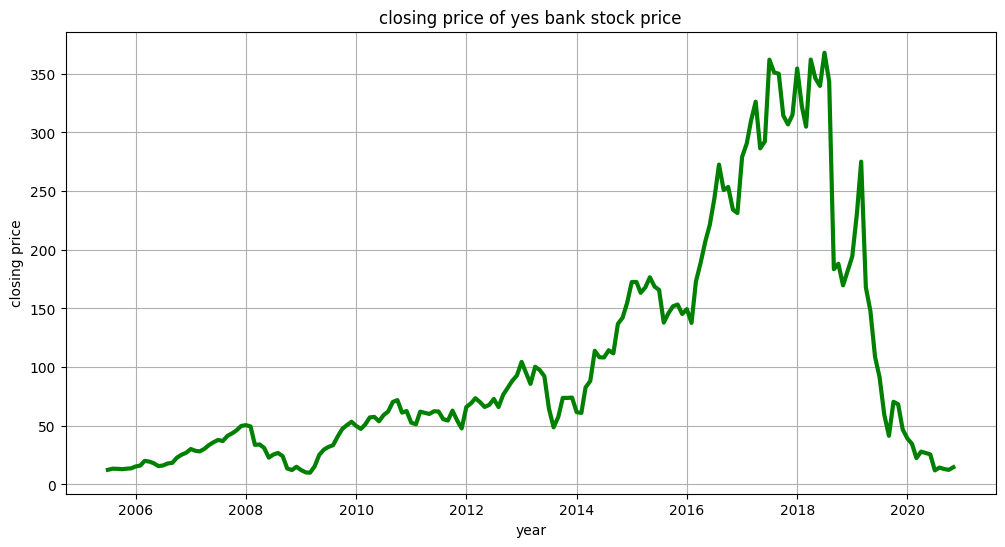

In [ ]:
#Plot the line chart
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Close'],color='green',linewidth=3)
plt.xlabel('year')
plt.ylabel('closing price')
plt.title('closing price of yes bank stock price')
plt.grid()
plt.show()

**After 2018 yes bank stock price fall beacuse of fraud case regarding to Rana kapoor**

**VIsualize all open,high and low price of stock**

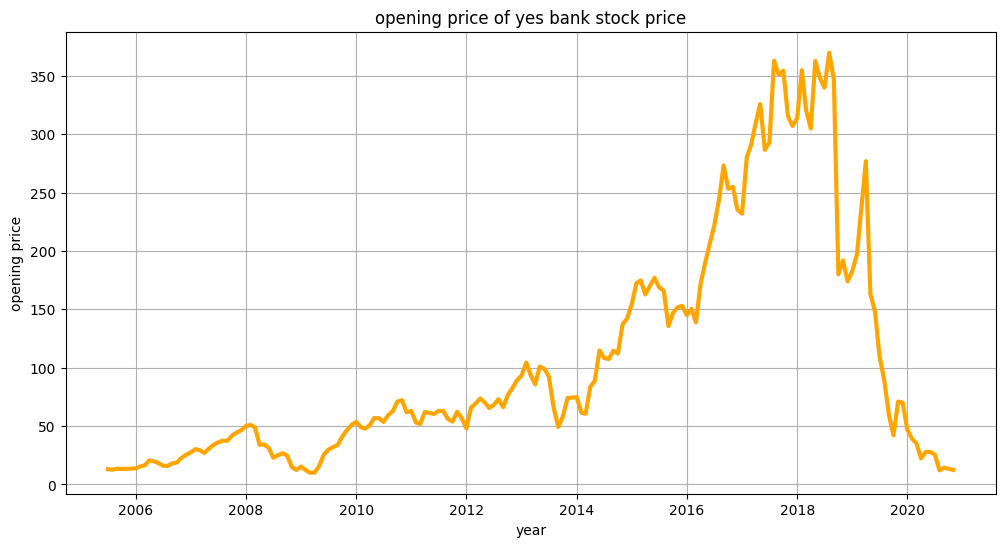

In [ ]:
#Plot the line chart
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Open'],color='orange',linewidth=3)
plt.xlabel('year')
plt.ylabel('opening price')
plt.title('opening price of yes bank stock price')
plt.grid()
plt.show()

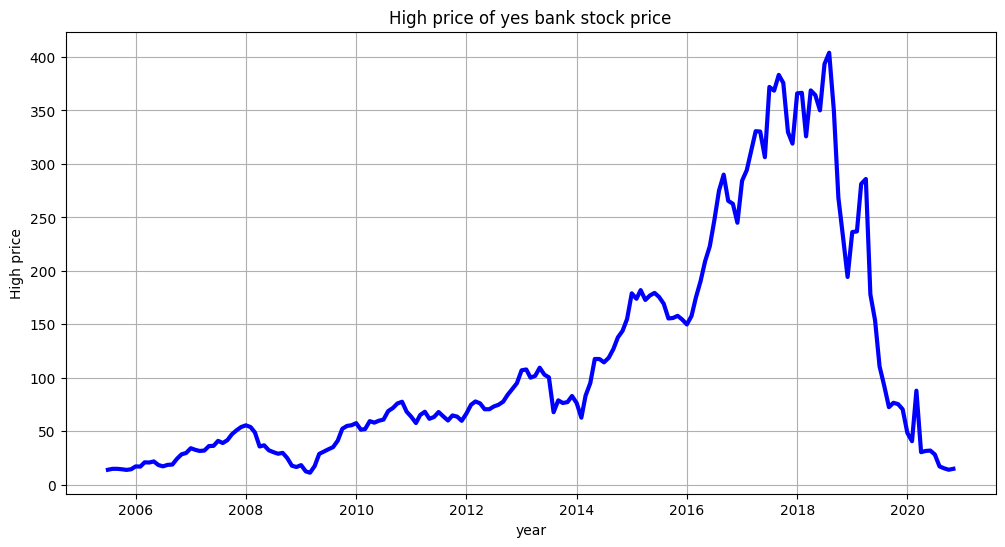

In [ ]:
#Plot the line chart
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['High'],color='blue',linewidth=3)
plt.xlabel('year')
plt.ylabel('High price')
plt.title('High price of yes bank stock price')
plt.grid()
plt.show()

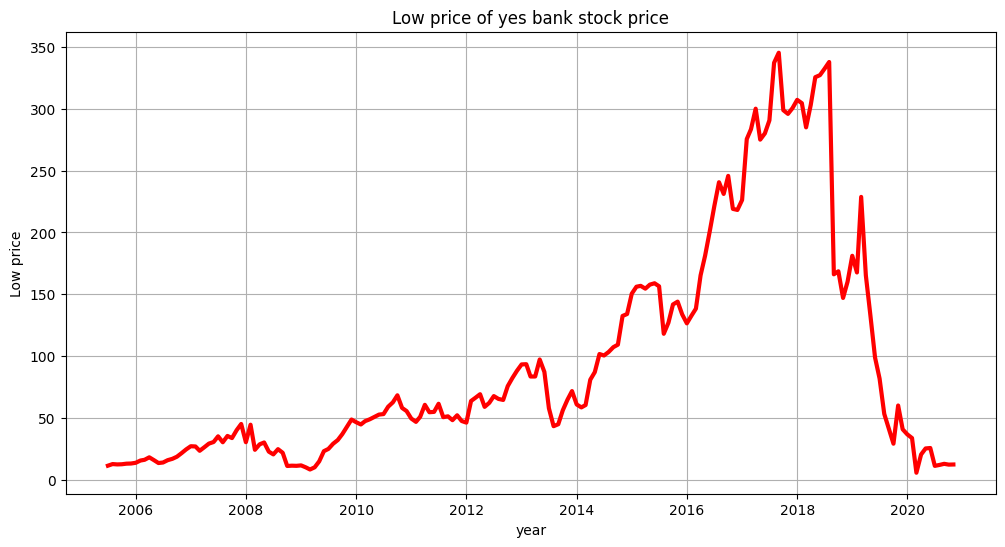

In [ ]:
#Plot the line chart
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Low'],color='red',linewidth=3)
plt.xlabel('year')
plt.ylabel('Low price')
plt.title('Low price of yes bank stock price')
plt.grid()
plt.show()

**we can see in 2017 to 2019 there can be high action seen because of difference in high and low lines.**

**Closing price of stock price is always important so i take close price as dependent variable**

 **Now to plot scatter plot with best fit line**

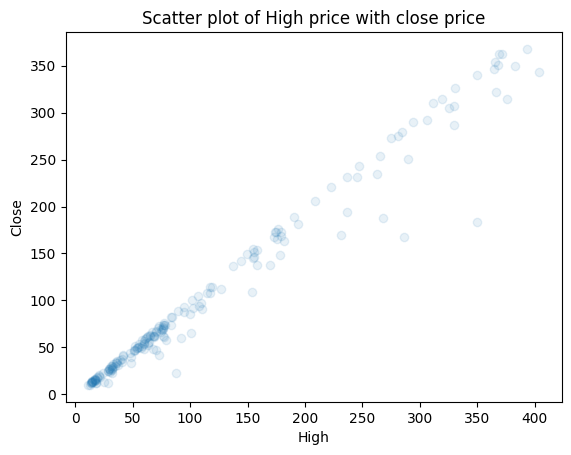

In [ ]:
#visualization of scatter plot between two features
plt.scatter(df['High'],df['Close'],alpha=0.1)
plt.title('Scatter plot of High price with close price')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

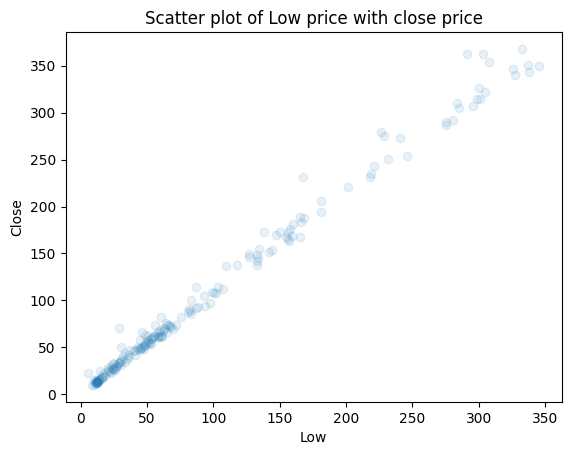

In [ ]:
#visualization of scatter plot between two features
plt.scatter(df['Low'],df['Close'],alpha=0.1)
plt.title('Scatter plot of Low price with close price')
plt.xlabel('Low')
plt.ylabel('Close')
plt.show()

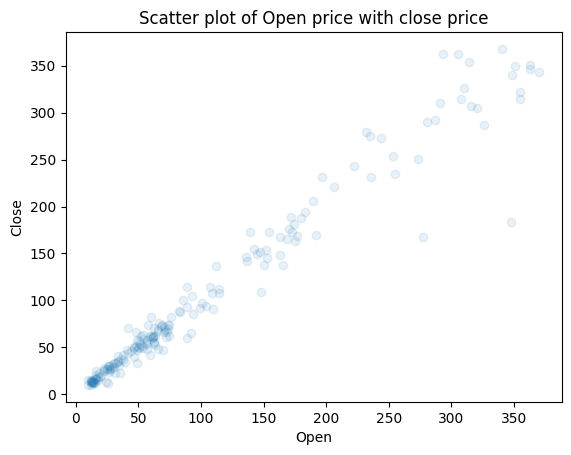

In [ ]:
#visualization of scatter plot between two features
plt.scatter(df['Open'],df['Close'],alpha=0.1)
plt.title('Scatter plot of Open price with close price')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

**Distribution of dependant variable Close Price of stock.**

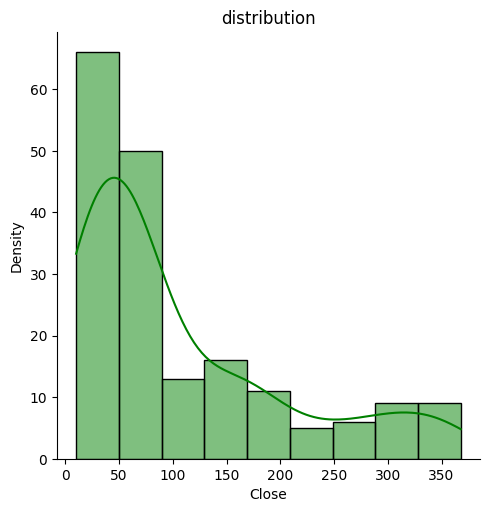

In [ ]:
#plot the bar graph
sns.displot(df['Close'],kde=True,color='g')
plt.title('distribution')
plt.xlabel('Close')
plt.ylabel('Density')
plt.show()

**It is rightly skewed distribution.**

**need to go with log transformation to make it normal distribution**

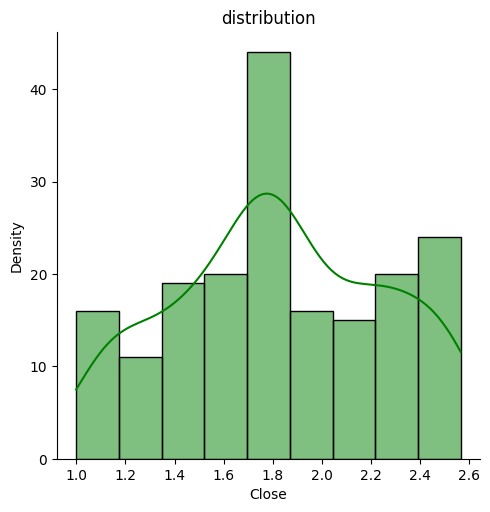

In [ ]:
#plot the bar graph
sns.displot(np.log10(df['Close']),kde=True,color='g')
plt.title('distribution')
plt.xlabel('Close')
plt.ylabel('Density')
plt.show()

**Now it seems more normal**

**Analyze of Numerical variables**

**What is Numerical Data**

Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form.



In [ ]:
#to show the no. of columns
df.describe().columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
#To show the independent variable
independent_features=list(set(df.describe().columns)-{'Close'})
independent_features

['High', 'Open', 'Low']

<Figure size 1200x600 with 0 Axes>

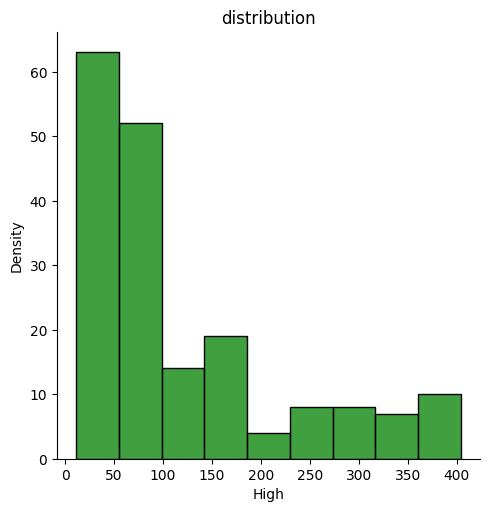

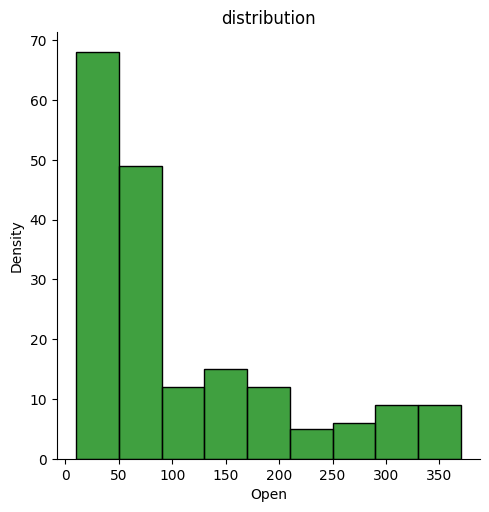

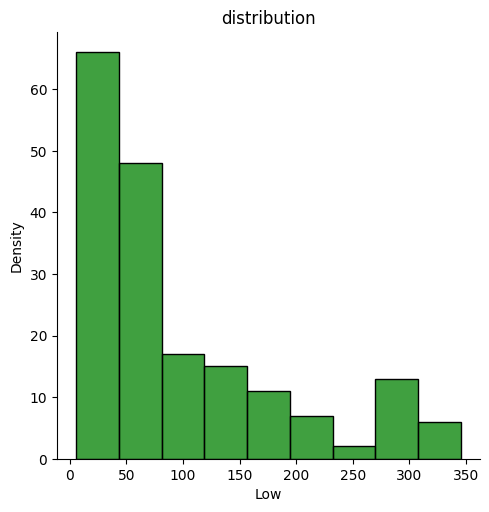

In [ ]:
#Visualization of independent variable through bar chart
plt.figure(figsize=(12,6))
for col in independent_features:
  sns.displot(df[col],color='g')
  plt.title('distribution')
  plt.xlabel(col)
  plt.ylabel('Density')
  plt.show()

**It looks all numerical features are rightly skewed.**

**Apply log transformation to make normal.**

<Figure size 1200x600 with 0 Axes>

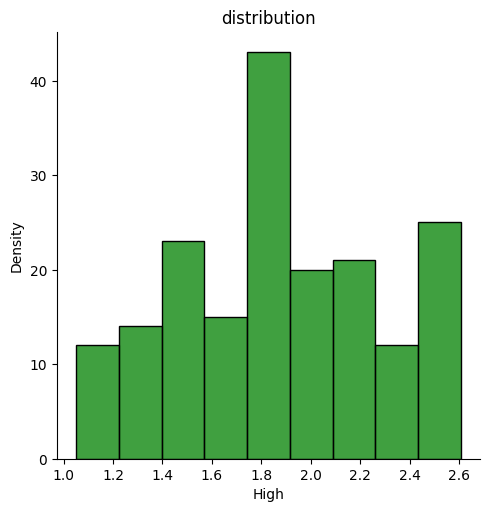

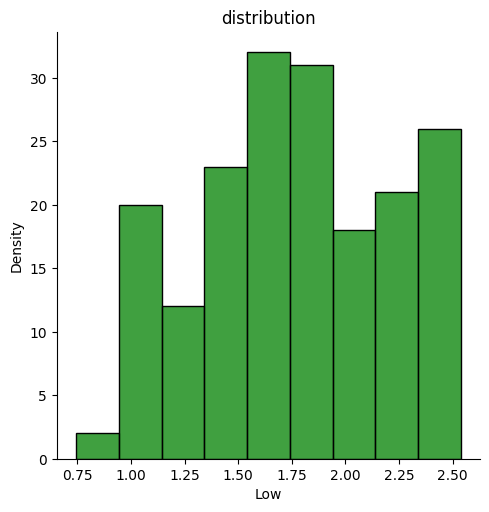

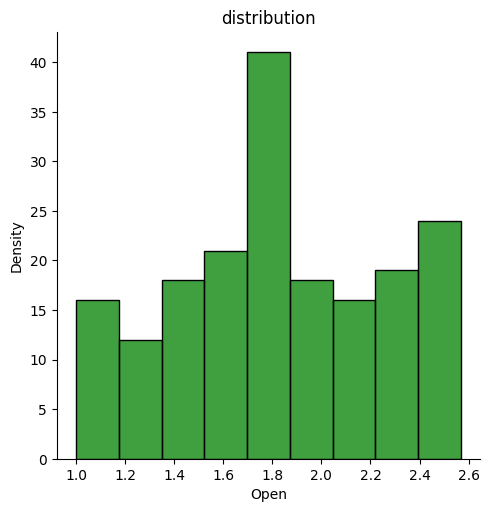

In [ ]:
#Visualization of independent variable through bar chart
plt.figure(figsize=(12,6))
for col in independent_features:
  sns.displot(np.log10(df[col]),color='g')
  plt.title('distribution')
  plt.xlabel(col)
  plt.ylabel('Density')
  plt.show()

**Now looks like normally distrubuted**

**Regression plot**

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses.

Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

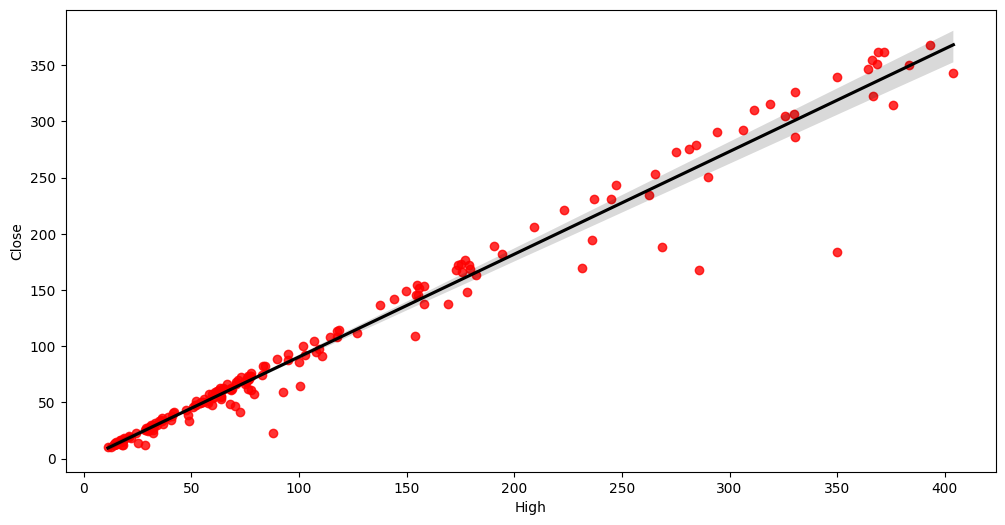

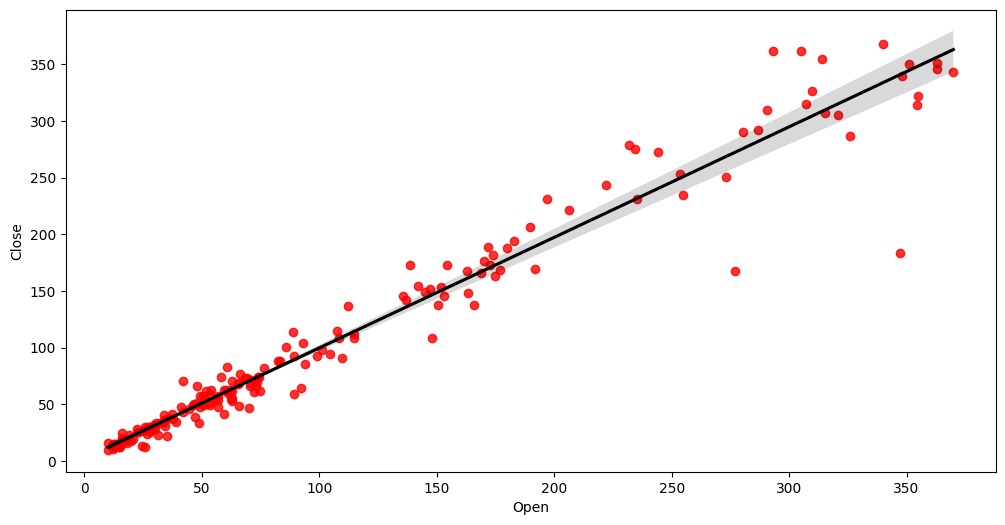

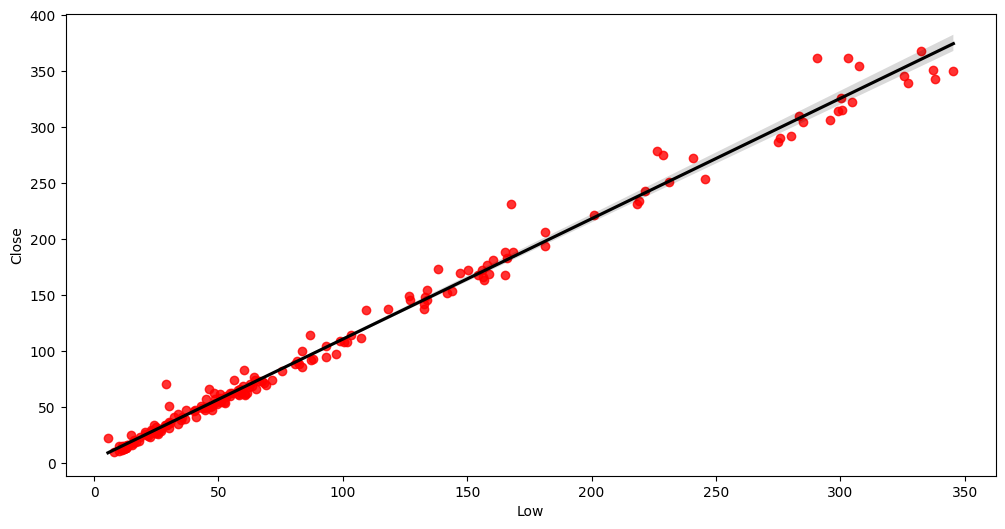

In [ ]:
for col in independent_features:
  plt.subplots(figsize=(12,6))
  sns.regplot(x=df[col],y=df['Close'],scatter_kws={'color':'red'},line_kws={'color':'black'})

From the above regression plot of all numerical features we see that the columns 'low', 'high', 'Open' are positively relation to the target variable.

which means the Close increases with increase of these features.

#Model Training

**Train Test split for regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

**Splitting data**

X = Independent variable

Y = Dependent variable

In [ ]:
#split the data into independent and dependent variable
x=df.drop(columns=['Date','Close'])
y=df['Close']

In [ ]:
#To show the values of independent features
x

,Open,High,Low
0,13.00,14.00,11.25
1,12.58,14.88,12.55
2,13.48,14.87,12.27
3,13.20,14.47,12.40
4,13.35,13.88,12.88
...,...,...,...
180,25.60,28.30,11.10
181,12.00,17.16,11.85
182,14.30,15.34,12.75
183,13.30,14.01,12.11


In [ ]:
#To show the values of dependent features
y

0      12.46
1      13.42
2      13.30
3      12.99
4      13.41
       ...  
180    11.95
181    14.37
182    13.15
183    12.42
184    14.67
Name: Close, Length: 185, dtype: float64

In [ ]:
#Data transformation
from scipy.stats import zscore
x=x.apply(zscore)
y=np.log10(y)

**splitting train test data with 80-20**

In [ ]:
#split the data into training and test dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [ ]:
#shape of the training dataset
x_train.shape

(148, 3)

In [ ]:
#shape of the test datset
x_test.shape

(37, 3)

#LINEAR REGRESSION

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

y_pred=β0+β1x

where β0 and β1 are intercept and slope respectively.

In case of multiple features the formula translates into:

y_pred=β0+β1x1+β2x2+β3x3+.....

where x_1,x_2,x_3 are the features values and β0,β1,β2..... are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

No multicollinearity in the dataset.

Independent variables should show linear relationship with dv.

Residual mean should be 0 or close to 0.

There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.

Let us now implement our first model. We will be using LinearRegression from scikit library.

In [ ]:
##import the packages
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [ ]:
# Train the model
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
#check the score
regressor.score(x_train,y_train)

0.8146653424416905

In [ ]:
#check the score
regressor.score(x_test,y_test)

0.8225699915389754

In [ ]:
#check the cofficient
regressor.coef_

array([-0.04654099,  0.19795929,  0.23173905])

In [ ]:
#To get the predicted value of training data
y_pred_train=regressor.predict(x_train)
y_pred_train

array([1.63953626, 1.63886509, 2.0670216 , 2.79649621, 2.07256466,
       1.5260232 , 1.47419272, 2.18284188, 1.97027678, 1.81036763,
       1.63108367, 1.82470445, 1.98230513, 2.3332237 , 2.26614408,
       1.97733273, 1.69707509, 2.06506328, 1.48359274, 1.5966444 ,
       1.45753712, 1.81365544, 1.54394291, 1.59249096, 1.5401027 ,
       1.67276486, 1.56360175, 2.73751095, 1.67866329, 1.48024912,
       2.01064236, 2.10915966, 1.88931667, 1.84464121, 1.68035133,
       1.9841213 , 1.48769876, 2.07661787, 2.24453228, 1.47375696,
       2.19680528, 1.51860535, 2.64125036, 1.62273311, 2.71315174,
       1.7799217 , 1.87622218, 1.47485365, 1.78792765, 2.13629523,
       1.63858886, 1.53420279, 1.47121255, 1.47314057, 1.64554688,
       1.69189528, 2.41820023, 1.48065803, 1.65874925, 1.46914475,
       2.57084538, 1.62596177, 1.66015632, 1.60707362, 1.96179569,
       1.75823541, 2.4226462 , 1.50440074, 1.6840037 , 1.63663635,
       1.77557764, 2.71621529, 1.61775175, 1.73418941, 1.48951

In [ ]:
#To get the predicted value of test dataset
y_pred_test=regressor.predict(x_test)
y_pred_test

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE=mean_squared_error(y_train,y_pred_train)
print("MSE: ",MSE)
#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE: ",RMSE)
#calculate MAE
MAE=mean_absolute_error(y_train,y_pred_train)
print("MAE: ",MAE)
#calculate R2 Score
r2=r2_score(y_train,y_pred_train)
print("r2: ",r2)
#calculate adjusted R2
adjusted_r2=(1-(1-r2_score(y_train,y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("adjusted_r2: ",adjusted_r2)

MSE:  0.033659395765946676
RMSE:  0.18346497149577812
MAE:  0.1559169766820056
r2:  0.8146653424416905
adjusted_r2:  0.7978167372091169


**Looks like our r2 score value is 0.81 that means our model is able to capture most of the data variance.**

In [ ]:
# import the package
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE=mean_squared_error(y_test,y_pred_test)
print("MSE: ",MSE)
#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE: ",RMSE)
#calculate MAE
MAE=mean_absolute_error(y_test,y_pred_test)
print("MAE: ",MAE)
#calculate R2 Score
r2=r2_score(y_test,y_pred_test)
print("r2: ",r2)
#calculate adjusted R2
adjusted_r2=(1-(1-r2_score(y_test,y_pred_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("adjusted_r2: ",adjusted_r2)

MSE:  0.03158251893048738
RMSE:  0.17771471219481907
MAE:  0.15128511034606282
r2:  0.8225699915389754
adjusted_r2:  0.8064399907697913


**Looks like our r2 score value is 0.82 that means our model is able to capture most of the data variance.**

**Linear Regression: Actual Vs. Predicted**

Lets know actual and model predicted curve 



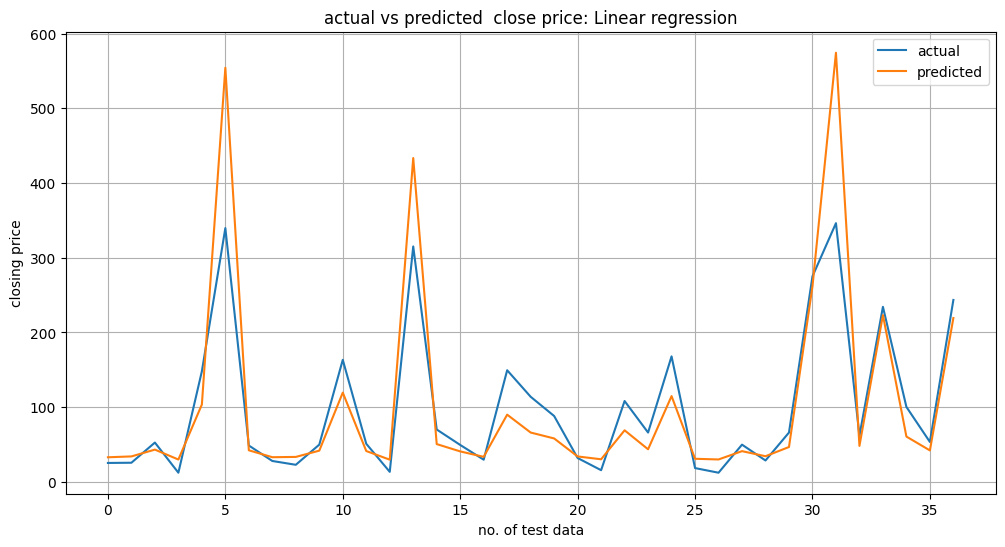

In [ ]:
# Actual Price vs. Predicted Price for Linear Regression Plot
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_test))
plt.title('actual vs predicted  close price: Linear regression')
plt.legend(['actual','predicted'])
plt.xlabel('no. of test data')
plt.ylabel('closing price')
plt.grid()
plt.show()

**There is much value difference seen spikes of price**

#LASSO REGRESSION

In [ ]:
#import the package
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,max_iter=3000)


In [ ]:
#fit data into Lasso Regression
lasso.fit(x_train,y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
#To get the predicted value of train dataset
y_pred_train_lasso=lasso.predict(x_train)

In [ ]:
#To get the predicted value of test dataset
y_pred_test_lasso=lasso.predict(x_test)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
#Calculate MSE
MSE_lasso=round(mean_squared_error(y_train,y_pred_train_lasso),4)
print("MSE_lasso: ",MSE_lasso)
#Calculate RMSE
RMSE_lasso=round(np.sqrt(MSE_lasso),4)
print("RMSE_lasso: ",RMSE_lasso)
#Calculate MAE
MAE_lasso=round(mean_absolute_error(y_train,y_pred_train_lasso),4)
print("MAE_lasso: ",MAE_lasso)
#Calculate R2 Score
r2_lasso=round(r2_score(y_train,y_pred_train_lasso),4)
print("r2_lasso: ",r2_lasso)
#Calculate Adjusted R2
adjusted_r2_lasso=round((1-(1-r2_score(y_train,y_pred_train_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))),4)
print("adjusted_r2_lasso: ",adjusted_r2_lasso)

MSE_lasso:  0.0437
RMSE_lasso:  0.209
MAE_lasso:  0.1662
r2_lasso:  0.7596
adjusted_r2_lasso:  0.7378


**Looks like our r2 score value is 0.75 that means our model is able to capture most of the data variance**

In [ ]:
#calculate MSE
MSE_lasso=round(mean_squared_error(y_test,y_pred_test_lasso),4)
print("MSE_lasso: ",MSE_lasso)
#calculate RMSE
RMSE_lasso=round(np.sqrt(MSE_lasso),4)
print("RMSE_lasso: ",RMSE_lasso)
#calculate MAE
MAE_lasso=round(mean_absolute_error(y_test,y_pred_test_lasso),4)
print("MAE_lasso: ",MAE_lasso)
#calculate R2
r2_lasso=round(r2_score(y_test,y_pred_test_lasso),4)
print("r2_lasso: ",r2_lasso)
#calculate adjusted R2
adjusted_r2_lasso=round((1-(1-r2_score(y_test,y_pred_test_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))),4)
print("adjusted_r2_lasso: ",adjusted_r2_lasso)

MSE_lasso:  0.0436
RMSE_lasso:  0.2088
MAE_lasso:  0.1672
r2_lasso:  0.755
adjusted_r2_lasso:  0.7328


**The r2_score for the test set is 0.75. This means our linear model is performing well on the data.**

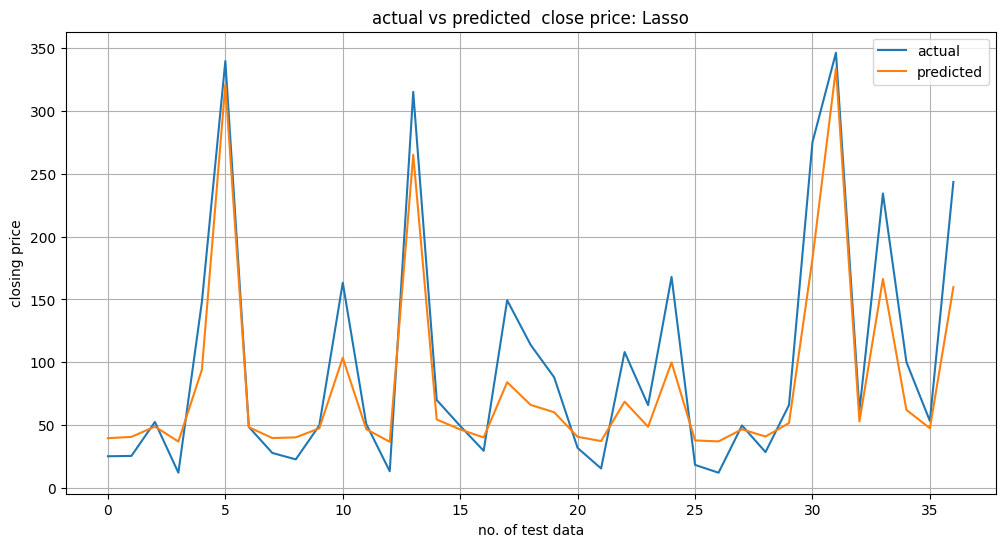

In [ ]:
# Actual vs. Predicted Price for Lasso Regression Plot
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_test_lasso))
plt.title('actual vs predicted  close price: Lasso')
plt.legend(['actual','predicted'])
plt.xlabel('no. of test data')
plt.ylabel('closing price')
plt.grid()
plt.show()

**As we see spike get accurately predicted in lasso but flat prices predication varies much**

#Cross Validation on Lasso Regression

In [ ]:
#Import the packages
from sklearn.model_selection import GridSearchCV
lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_grid_cv = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

In [ ]:
#fit data into gridsearchCV
lasso_grid_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
#Check the parameters
lasso_grid_cv.best_params_

{'alpha': 0.01}

In [ ]:
#check the score
round(lasso_grid_cv.best_score_,4)

-0.0352

In [ ]:
#To get the predicted value of train dataset
lasso_pred_grid_cv=lasso_grid_cv.predict(x_test)
lasso_pred_grid_cv

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

**Evaluation Metrics of Lasso Regression after Validation**:

In [ ]:
#Calculate MSE
MSE_lasso_grid=round(mean_squared_error(y_test,lasso_pred_grid_cv),4)
print("MSE_lasso_grid: ",MSE_lasso_grid)
#Calculate RMSE
RMSE_lasso_grid=round(np.sqrt(MSE_lasso_grid),4)
print("RMSE_lasso_grid: ",RMSE_lasso_grid)
#Calculate MAE
MAE_lasso_grid=round(mean_absolute_error(y_test,lasso_pred_grid_cv),4)
print("MAE_lasso_grid: ",MAE_lasso_grid)
#Calculate MAPE
MAPE_lasso_grid=round(mean_absolute_percentage_error(y_test,lasso_pred_grid_cv),4)
print("MAPE_lasso_grid: ",MAPE_lasso_grid)
#Calculate R2
r2_lasso_grid=round(r2_score(y_test,lasso_pred_grid_cv),4)
print("r2_lasso_grid: ",r2_lasso_grid)

MSE_lasso_grid:  0.0322
RMSE_lasso_grid:  0.1794
MAE_lasso_grid:  0.1528
MAPE_lasso_grid:  0.0968
r2_lasso_grid:  0.819


**After validation accuracy increase**

Lasso Regression After Validation: Actual Vs. Predicted

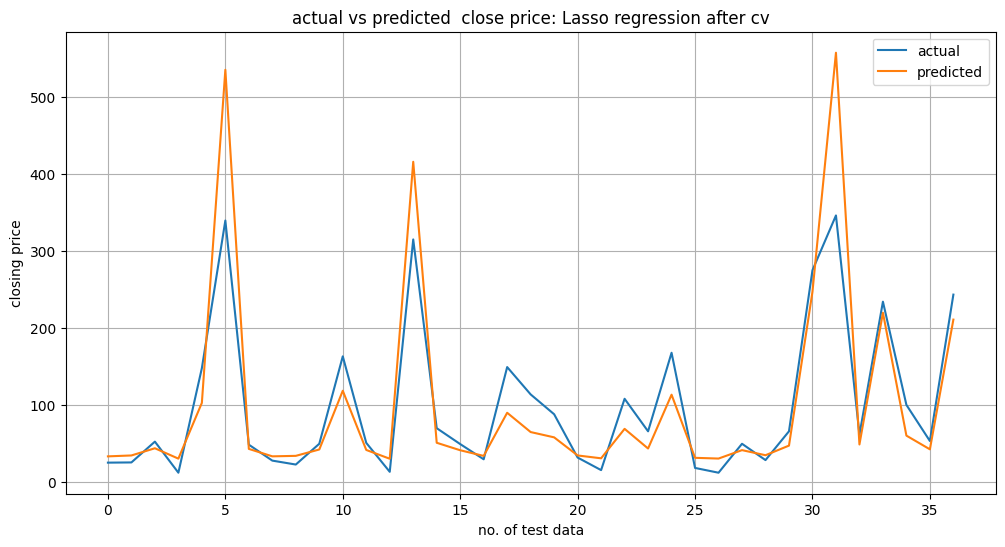

In [ ]:
# Actual vs. Predicted Price for Lasso Regression Plot after CV
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(lasso_pred_grid_cv))
plt.title('actual vs predicted  close price: Lasso regression after cv')
plt.legend(['actual','predicted'])
plt.xlabel('no. of test data')
plt.ylabel('closing price')
plt.grid()
plt.show()

#RIDGE REGRESSION

In [ ]:
#Import the packages
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
#fit the data into ridge algorithm
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#To get the predicted value of train and test data
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)

In [ ]:
#Calculate MSE
MSE_ridge=round(mean_squared_error(y_train,y_pred_train_ridge),4)
print("MSE_ridge: ",MSE_ridge)
#Calculate RMSE
RMSE_ridge=round(np.sqrt(MSE_ridge),4)
print("RMSE_ridge: ",RMSE_ridge)
#Calculate MAE
MAE_ridge=round(mean_absolute_error(y_train,y_pred_train_ridge),4)
print("MAE_ridge: ",MAE_ridge)
#Calculate R2 score
r2_ridge=round(r2_score(y_train,y_pred_train_ridge),4)
print("r2_ridge: ",r2_ridge)
#Calculate adjusted R2
adjusted_r2_ridge=round((1-(1-r2_score(y_train,y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))),4)
print("adjusted_r2_ridge: ",adjusted_r2_ridge)

MSE_ridge:  0.0337
RMSE_ridge:  0.1836
MAE_ridge:  0.156
r2_ridge:  0.8147
adjusted_r2_ridge:  0.7978


**Looks like our r2 score value is 0.81 that means our model is able to capture most of the data variance.**

In [ ]:
#Calculate MSE
MSE_ridge=round(mean_squared_error(y_test,y_pred_test_ridge),4)
print("MSE_ridge: ",MSE_ridge)
#Calculate RMSE
RMSE_ridge=round(np.sqrt(MSE_ridge),4)
print("RMSE_ridge: ",RMSE_ridge)
#Calculate MAE
MAE_ridge=round(mean_absolute_error(y_test,y_pred_test_ridge),4)
print("MAE_ridge: ",MAE_ridge)
#Calculate R2
r2_ridge=round(r2_score(y_test,y_pred_test_ridge),4)
print("r2_ridge: ",r2_ridge)
#Calculate adjusted R2
adjusted_r2_ridge=round((1-(1-r2_score(y_test,y_pred_test_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))),4)
print("adjusted_r2_ridge: ",adjusted_r2_ridge)

MSE_ridge:  0.0317
RMSE_ridge:  0.178
MAE_ridge:  0.1514
r2_ridge:  0.8221
adjusted_r2_ridge:  0.806


**The r2_score for the test set is 0.82. This means our linear model is performing well on the data.**

#Ridge Regression: Actual Vs. Predicted

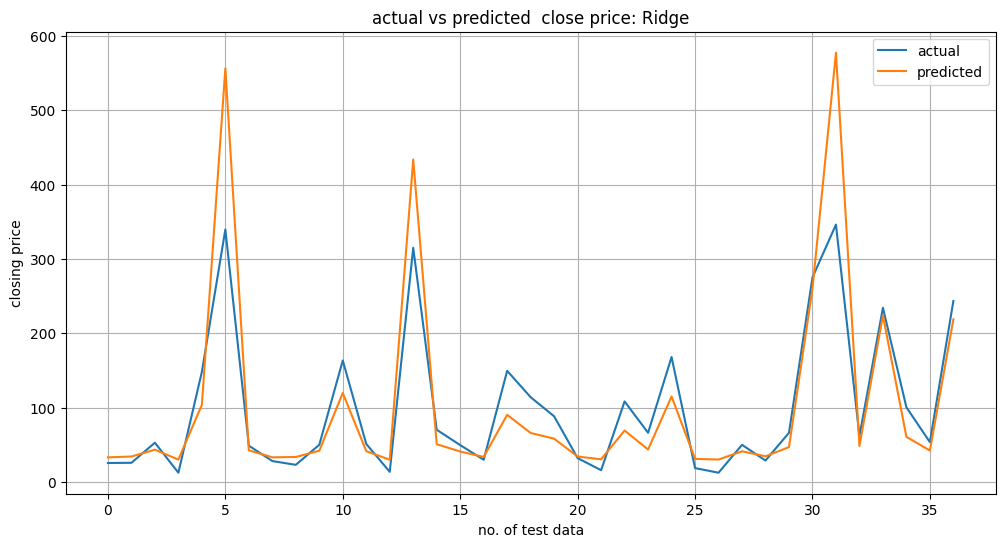

In [ ]:
# Actual vs. Predicted Price for Lasso Regression Plot after CV
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_test_ridge))
plt.title('actual vs predicted  close price: Ridge')
plt.legend(['actual','predicted'])
plt.xlabel('no. of test data')
plt.ylabel('closing price')
plt.grid()
plt.show()

#ELASTIC NET REGRESSION

In [ ]:
#Import the package
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet(alpha=0.1)
#fit the elastic algorithm
elasticnet.fit(x_train,y_train)


ElasticNet(alpha=0.1)

In [ ]:
# To check the score
elasticnet.score(x_train,y_train)

0.7958095661377872

In [ ]:
# To get the predicted values of train and test data
y_pred_train_en=elasticnet.predict(x_train)
y_pred_test_en=elasticnet.predict(x_test)

In [ ]:
#Calculate MSE
MSE_en=round(mean_squared_error(y_train,y_pred_train_en),4)
print("MSE_en: ",MSE_en)
#Calculate RMSE
RMSE_en=round(np.sqrt(MSE_en),4)
print("RMSE_en: ",RMSE_en)
#Calculate MAE
MAE_en=round(mean_absolute_error(y_train,y_pred_train_en),4)
print("MAE_en: ",MAE_en)
#Calculate R2
r2_en=round(r2_score(y_train,y_pred_train_en),4)
print("r2_en: ",r2_en)
#Calculate adjusted R2
adjusted_r2_en=round((1-(1-r2_score(y_train,y_pred_train_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))),4)
print("adjusted_r2_en: ",adjusted_r2_en)

MSE_en:  0.0371
RMSE_en:  0.1926
MAE_en:  0.1564
r2_en:  0.7958
adjusted_r2_en:  0.7772


**Looks like our r2 score value is 0.79 that means our model is able to capture most of the data variance.**

In [ ]:
#calculate MSE
MSE_en=round(mean_squared_error(y_test,y_pred_test_en),4)
print("MSE_en: ",MSE_en)
#Calculate RMSE
RMSE_en=round(np.sqrt(MSE_en),4)
print("RMSE_en: ",RMSE_en)
#Calculate MAE
MAE_en=round(mean_absolute_error(y_test,y_pred_test_en),4)
print("MAE_en: ",MAE_en)
#Calculate R2
r2_en=round(r2_score(y_test,y_pred_test_en),4)
print("r2_en: ",r2_en)
#Calculate adjusted R2
adjusted_r2_en=round((1-(1-r2_score(y_test,y_pred_test_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))),4)
print("adjusted_r2_en: ",adjusted_r2_en)

MSE_en:  0.0364
RMSE_en:  0.1908
MAE_en:  0.1574
r2_en:  0.7955
adjusted_r2_en:  0.7769


**The r2_score for the test set is 0.79. This means our linear model is performing well on the data**

**Elastic Net: Actual Vs. Predicted**

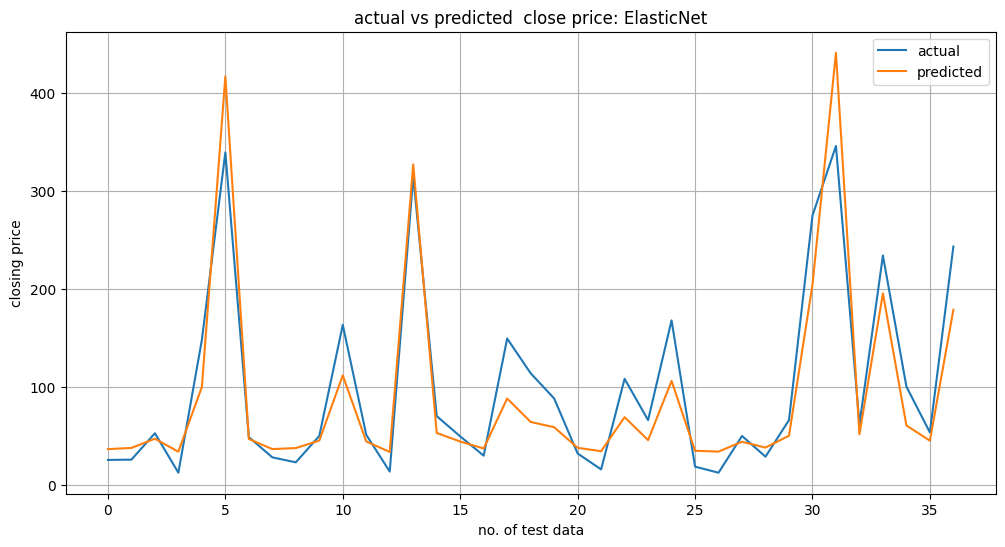

In [ ]:
# Actual vs. Predicted  close Price for elasticnet
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_test_en))
plt.title('actual vs predicted  close price: ElasticNet')
plt.legend(['actual','predicted'])
plt.xlabel('no. of test data')
plt.ylabel('closing price')
plt.grid()
plt.show()

#Hyperparameter tuning

Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

In [ ]:
#import the packages
from sklearn.model_selection import GridSearchCV
elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model_cv = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=5)

In [ ]:
#fit the GridsearchCV
elastic_model_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
#To check the parameters
elastic_model_cv.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [ ]:
#To check the score
elastic_model_cv.best_score_

-0.03671253815080321

In [ ]:
#To get the predicted value of train and test data
y_pred_train_el_cv=elastic_model_cv.predict(x_train)
y_pred_test_el_cv=elastic_model_cv.predict(x_test)

In [ ]:
#calculate MSE
MSE_el_cv=round(mean_squared_error(y_train,y_pred_train_el_cv),4)
print("MSE_el_cv: ",MSE_el_cv)
#calculate RMSE
RMSE_el_cv=round(np.sqrt(MSE_el_cv),4)
print("RMSE_el_cv: ",RMSE_el_cv)
#calculate MAE
MAE_el_cv=round(mean_absolute_error(y_train,y_pred_train_el_cv),4)
print("MAE_el_cv: ",MAE_el_cv)
#calculate R2 Score
r2_el_cv=round(r2_score(y_train,y_pred_train_el_cv),4)
print("r2_el_cv: ",r2_el_cv)
#calculate adjusted R2
adjusted_r2_el_cv=round((1-(1-r2_score(y_train,y_pred_train_el_cv))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))),4)
print("adjusted_r2_el_cv: ",adjusted_r2_el_cv)

MSE_el_cv:  0.0338
RMSE_el_cv:  0.1838
MAE_el_cv:  0.1555
r2_el_cv:  0.814
adjusted_r2_el_cv:  0.797


In [ ]:
#calculate MSE
MSE_el_cv=round(mean_squared_error(y_test,y_pred_test_el_cv),4)
print("MSE_el_cv: ",MSE_el_cv)
#calculate RMSE
RMSE_el_cv=round(np.sqrt(MSE_el_cv),4)
print("RMSE_el_cv: ",RMSE_el_cv)
#calculate MAE
MAE_el_cv=round(mean_absolute_error(y_test,y_pred_test_el_cv),4)
print("MAE_el_cv: ",MAE_el_cv)
#calculate R2
r2_el_cv=round(r2_score(y_test,y_pred_test_el_cv),4)
print("r2_el_cv: ",r2_el_cv)
#calculate Adjusred R2
adjusted_r2_el_cv=round((1-(1-r2_score(y_test,y_pred_test_el_cv))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))),4)
print("adjusted_r2_el_cv: ",adjusted_r2_el_cv)

MSE_el_cv:  0.0322
RMSE_el_cv:  0.1794
MAE_el_cv:  0.1528
r2_el_cv:  0.819
adjusted_r2_el_cv:  0.8025


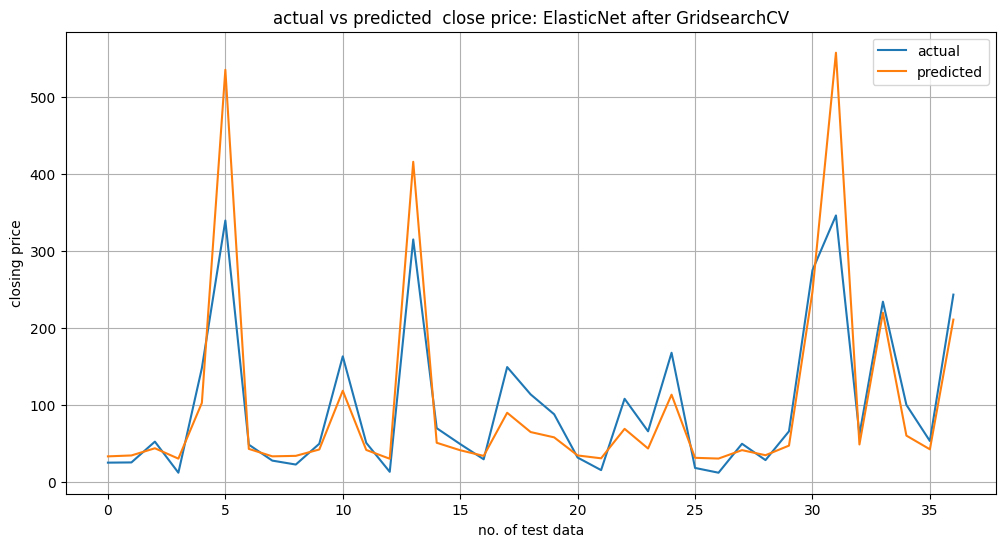

In [ ]:
# Actual vs. Predicted  close Price for elasticnet after gridsearchcv
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_test_el_cv))
plt.title('actual vs predicted  close price: ElasticNet after GridsearchCV')
plt.legend(['actual','predicted'])
plt.xlabel('no. of test data')
plt.ylabel('closing price')
plt.grid()
plt.show()

#CONCLUSION

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Close' and also transformed it.

Next we implemented 4 machine learning algorithms Linear Regression,lasso,ridge,elasticnet. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

No overfitting is seen. Linear Regression and lasso Regression are almost same R2 Score 82%.

ElasticNet gridsearchcv gives the highest R2 score of 81% recpectively for Train Set and 80% for Test set.

We can deploy this model.

Target variable(dependent variable) strongly dependent on independent variables